In [5]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# consuming time bar plot

In [61]:
time = pd.DataFrame([[32,2],[30,5],[476,36],[929,63],[645,60]],columns=["adaptive","stationary"],index=["Power","SMTP","HTTP","SMTP+HTTP","FOREST"])

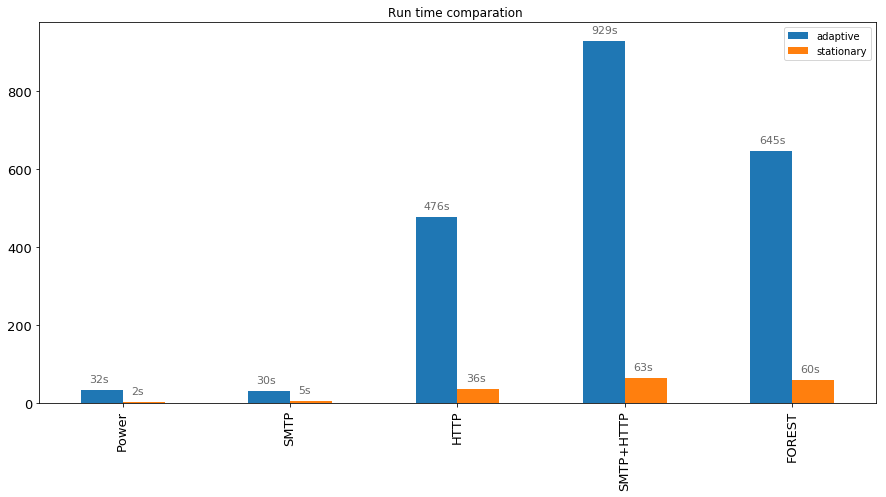

In [65]:
ax = time.plot(kind='bar',figsize=(15,7),fontsize=13)
ax.set_title("Run time comparation ")
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.05, i.get_height()+20, \
            str(round((i.get_height()), 2))+"s", fontsize=11, color='dimgrey')

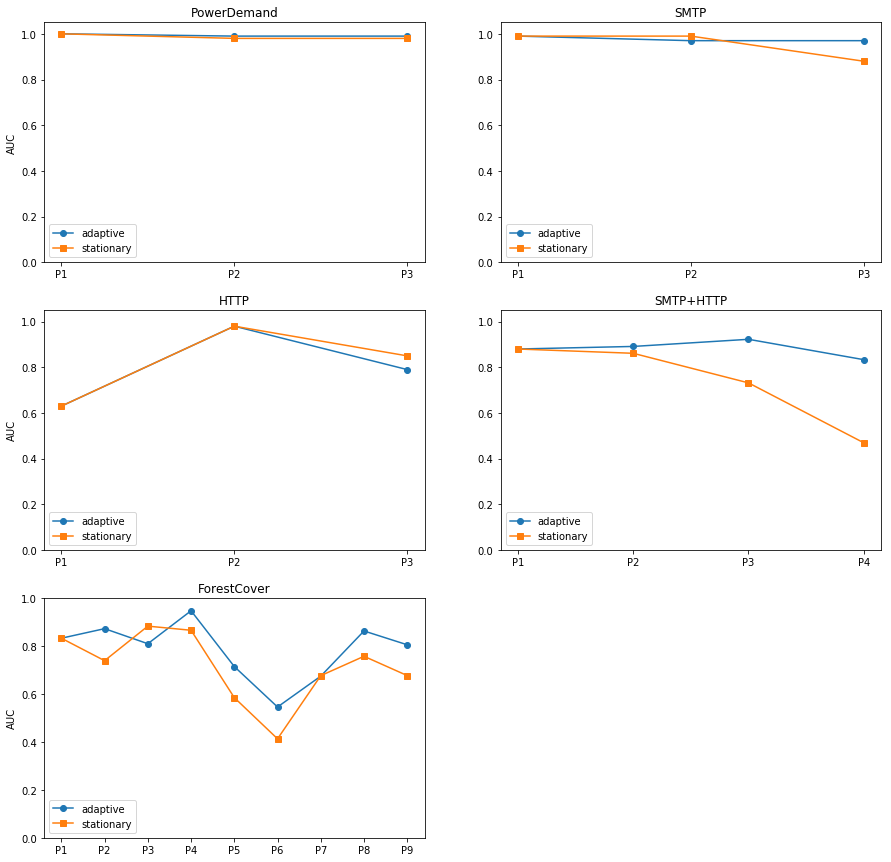

In [12]:
power = [[1.,0.99,0.99],[1,0.98,0.98]]
smtp = [[0.99,0.97,0.97],[0.99,0.99,0.88]]
http = [[0.63,0.98,0.79],[0.63,0.98,0.85]]
smtp_http = [[0.87,0.88,0.81,1.,0.86],[0.87,0.83,0.85,0.25,0.48]]
smtp_http = [[0.88002573082696012, 0.89128055713473564, 0.92252139675426459, 0.83336262304716757],[0.88002573082696012, 0.86127974498497517, 0.73172859920607136, 0.46945370152374]]
forest = [[0.83217954487643575, 0.87207290870024401, 0.80922606034105815, 0.94665435613346671, 0.71406650641025637, 0.54540229885057467, 0.67406609195402301, 0.86242255225667275, 0.80482838708333537],[0.83217954487643575, 0.73856476929239956, 0.88257542632269359, 0.86537634040904032, 0.58445913461538457, 0.41278735632183911, 0.6761673850574712, 0.75685683842197349, 0.67642724351797368]]

figure = plt.figure(figsize=(15,15))
ax1 = plt.subplot(321)
ax2 = plt.subplot(322)
ax3 = plt.subplot(323)
ax4 = plt.subplot(324)
ax5 = plt.subplot(325)
ax1.plot(range(3),power[0],label="adaptive",marker="o")
ax1.plot(range(3),power[1],label="stationary",marker="s")
ax1.legend(loc=3)
ax1.set_ylabel("AUC")
ax1.set_title("PowerDemand")
ax1.xaxis.set_ticks(range(3))
ax1.set_xticklabels(["P1","P2","P3"])
ax1.set_ylim(0,1.05)
ax2.plot(range(3),smtp[0],label="adaptive",marker="o")
ax2.plot(range(3),smtp[1],label="stationary",marker="s")
ax2.legend(loc=3)
ax2.set_title("SMTP")
ax2.xaxis.set_ticks(range(3))
ax2.set_xticklabels(["P1","P2","P3"])
ax2.set_ylim(0,1.05)
ax3.plot(range(3),http[0],label="adaptive",marker="o")
ax3.plot(range(3),http[1],label="stationary",marker="s")
ax3.legend(loc=3)
ax3.set_ylabel("AUC")
ax3.set_title("HTTP")
ax3.xaxis.set_ticks(range(3))
ax3.set_xticklabels(["P1","P2","P3"])
ax3.set_ylim(0,1.05)
ax4.plot(range(4),smtp_http[0],label="adaptive",marker="o")
ax4.plot(range(4),smtp_http[1],label="stationary",marker="s")
ax4.legend(loc=3)
ax4.xaxis.set_ticks(range(4))
ax4.set_xticklabels(["P1","P2","P3","P4"])#,"P5","P6","P7","P8","P9","P10","P11"])
ax4.set_title("SMTP+HTTP")
ax4.set_ylim(0,1.05)
ax5.plot(range(9),forest[0],label="adaptive",marker="o")
ax5.plot(range(9),forest[1],label="stationary",marker="s")
ax5.legend(loc=3)
ax5.set_ylabel("AUC")
ax5.set_title("ForestCover")
ax5.xaxis.set_ticks(range(9))
ax5.set_xticklabels(["P1","P2","P3","P4","P5","P6","P7","P8","P9"])
ax5.set_ylim(0,1)
plt.show()

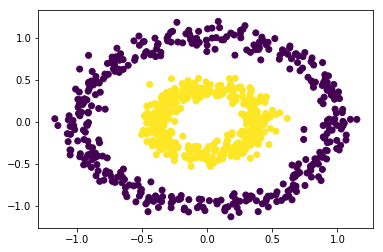

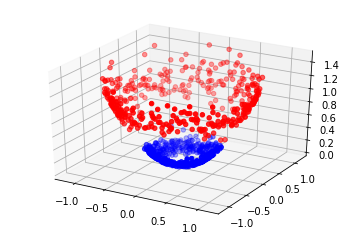

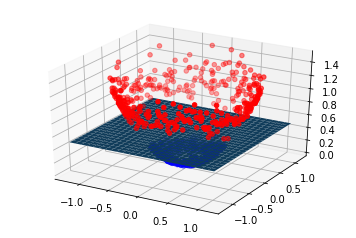

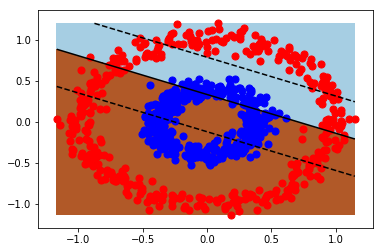

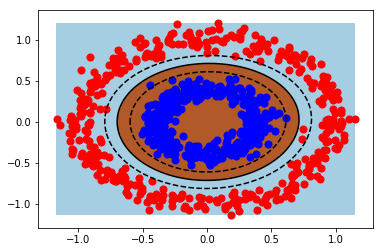

In [9]:
from sklearn.datasets import make_circles

from matplotlib import pyplot as plt

import numpy as np

from mpl_toolkits.mplot3d import Axes3D

from sklearn.svm import SVC

from sklearn.metrics import accuracy_score

visualization=True



def create_data():

	x,y=make_circles(n_samples=800,noise=.07,factor=.4)

	if visualization:

		plt.scatter(x[:,0],x[:,1],c=y+1)

		plt.show()

	return x,y



def project_data(data):

    x=data[:,0]

    y=data[:,1]

    z=x**2+y**2

    return x,y,z



def plot_decision_surface_manual(x,y,z,label):

	fig = plt.figure()



	ax1 = fig.add_subplot(111,projection='3d')

	ax1.scatter(x[label==0],y[label==0],z[label==0],c='r')

	ax1.scatter(x[label==1],y[label==1],z[label==1],c='b')

	plane_x=np.arange(-1.25,1.25,.1)

	plane_y=np.arange(-1.25,1.25,.1)

	X,Y=np.meshgrid(plane_x,plane_y)

	Z=np.zeros(X.shape)

	Z[:,:]=.5

	ax1.plot_surface(X,Y,Z)

	plt.show()

	

def plot_decision_surface_sklearn(clf,X,y):

    X0 = X[np.where(y == 0)]

    X1 = X[np.where(y == 1)]



    plt.figure()

    

    x_min = X[:, 0].min()

    x_max = X[:, 0].max()

    y_min = X[:, 1].min()

    y_max = X[:, 1].max()



    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]

    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    Z = Z.reshape(XX.shape)

    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)

    

    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],

              linestyles=['--', '-', '--'],

              levels=[-.5, 0, .5])

    plt.scatter(X0[:, 0], X0[:, 1], c='r',s=50)

    plt.scatter(X1[:, 0], X1[:, 1], c='b',s=50)

    plt.show()



data,label=create_data()

x,y,z=project_data(data)

if visualization:

	fig = plt.figure()

	ax = fig.add_subplot(111, projection='3d')

	ax.scatter(x[label==0],y[label==0],z[label==0],c='r')

	ax.scatter(x[label==1],y[label==1],z[label==1],c='b')

	plt.show()

	plot_decision_surface_manual(x,y,z,label)

train=np.c_[x,y]

for kernel_type in ['linear','rbf']:

	clf=SVC(kernel=kernel_type)

	clf.fit(train,label)

	if visualization:

		plot_decision_surface_sklearn(clf,train,label)

	output=clf.predict(train)
